# <div style="text-align: center; font-size: 30px; font-weight: bold; color: #0066CC;">Analysis and Optimization of Global Energy Sustainability</div>

**Dataset Description:**

This comprehensive dataset provides valuable insights into global sustainable energy indicators from 2000 to 2020. By analyzing factors such as renewable energy adoption, CO2 emissions, and energy access, this project aims to uncover actionable insights to support sustainable energy transitions.

**Key Features:**

- **Entity:** The name of the country or region for which the data is reported.
- **Year:** The year for which the data is reported, ranging from 2000 to 2020.
- **Access to electricity:** The percentage of the population with access to electricity.
- **Access to clean fuels for cooking:** The percentage of the population with primary reliance on clean fuels.
- **Renewable-electricity-generating-capacity-per-capita:** Installed renewable energy capacity per person.
- **Financial flows to developing countries:** Aid and assistance from developed countries for clean energy projects.
- **Renewable energy share in total final energy consumption:** Percentage of renewable energy in final energy consumption.
- **Electricity from fossil fuels:** Electricity generated from fossil fuels (coal, oil, gas) in terawatt-hours.
- **Electricity from nuclear:** Electricity generated from nuclear power in terawatt-hours.
- **Electricity from renewables:** Electricity generated from renewable sources (hydro, solar, wind, etc.) in terawatt-hours.
- **Low-carbon electricity:** Percentage of electricity from low-carbon sources (nuclear and renewables).
- **Primary energy consumption per capita:** Energy consumption per person in kilowatt-hours.
- **Energy intensity level of primary energy:** Energy use per unit of GDP at purchasing power parity.
- **Value_co2_emissions (metric tons per capita):** Carbon dioxide emissions per person in metric tons.
- **Renewables:** Equivalent primary energy that is derived from renewable sources.
- **GDP growth:** Annual GDP growth rate based on constant local currency.
- **GDP per capita:** Gross domestic product per person.
- **Density:** Population density in persons per square kilometer.
- **Land Area:** Total land area in square kilometers.
- **Latitude:** Latitude of the country's centroid in decimal degrees.
- **Longitude:** Longitude of the country's centroid in decimal degrees.

**Why This Dataset?**

The dataset is particularly relevant to sustainability analysts, energy analysts, and environment analysts due to its wide-ranging features. It allows us to:
- Track global progress toward Sustainable Development Goal 7 (Affordable and Clean Energy).
- Analyze the interplay between energy consumption, economic growth, and environmental impact.
- Develop data-driven strategies for reducing carbon footprints and improving energy equity.

**Potential Use Cases:**

- **Energy Consumption Prediction:** Predict future energy usage, aid planning, and track SDG 7 progress.
- **Carbon Emission Forecasting:** Forecast CO2 emissions, support climate strategies.
- **Energy Access Classification:** Categorize regions for infrastructure development, understand sustainable energy's role.
- **Sustainable Development Goal Tracking:** Monitor progress towards Goal 7, evaluate policy impact.
- **Energy Equity Analysis:** Analyze access, density, and growth for equitable distribution.
- **Energy Efficiency Optimization:** Identify intensive areas for environmental impact reduction.
- **Renewable Energy Potential Assessment:** Identify regions for green investments based on capacity.
- **Renewable Energy Investment Strategies:** Guide investors towards sustainable opportunities.

**Key Focus Areas in This Project:**

1. Renewable energy share analysis.
2. Carbon emissions forecasting and reduction strategies.
3. Regional equity in access to clean energy.

This dataset is ideal for exploring the intersection of sustainability, energy, and economic development.

## <div style="border-radius:10px; border:2px solid #FFA500; padding: 15px; background-color: #FFFACD; font-size:110%; text-align:center; color: #FF4500;">Start</div>

## <div style="border-radius:10px; border:2px solid #3eb489; padding: 15px; background-color: #0066CC; font-size:110%; text-align:center; color: white;">Import Libraries</div>

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import warnings
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

## <div style="border-radius:10px; border:2px solid #3eb489; padding: 15px; background-color: #0066CC; font-size:110%; text-align:center; color: white;">Load the Dataset</div>

In [7]:
# Load the dataset
# Purpose: Load and inspect the global sustainable energy dataset

df = pd.read_csv('/Users/pashaarrighi/Documents/Portfolio/Python/sustainable_energy_project/global-data-on-sustainable-energy (1).csv')
print("Dataset Loaded. Shape of the DataFrame:", df.shape)

Dataset Loaded. Shape of the DataFrame: (3649, 21)


In [8]:
# Create a backup of the original dataset
# Purpose: Preserve the original dataset for reference or recovery.

df_original = df.copy()

In [9]:
# Display a sample of the dataset
# Purpose: Get an overview of the data

print("Sample Data:")
print(df.head())

Sample Data:
        Entity  Year  Access to electricity (% of population)  \
0  Afghanistan  2000                                 1.613591   
1  Afghanistan  2001                                 4.074574   
2  Afghanistan  2002                                 9.409158   
3  Afghanistan  2003                                14.738506   
4  Afghanistan  2004                                20.064968   

   Access to clean fuels for cooking  \
0                                6.2   
1                                7.2   
2                                8.2   
3                                9.5   
4                               10.9   

   Renewable-electricity-generating-capacity-per-capita  \
0                                               9.22      
1                                               8.86      
2                                               8.47      
3                                               8.09      
4                                               7.75      



## <div style="border-radius:10px; border:2px solid #3eb489; padding: 15px; background-color: #0066CC; font-size:110%; text-align:center; color: white;">Exploratory Data Analysis (EDA)</div>

In [11]:
# Check for missing values
# Purpose: Identify missing values in the dataset

missing_values = df.isna().sum()
print("\n--- Missing Values Summary ---")
print(missing_values[missing_values > 0])  # Display only columns with missing values


--- Missing Values Summary ---
Access to electricity (% of population)                               10
Access to clean fuels for cooking                                    169
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US $)                      2089
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
Value_co2_emissions_kt_by_country                                    428
Renewables (% equivalent primary energy)                            2137
gdp_growth                                                           317
gdp_per_capita     

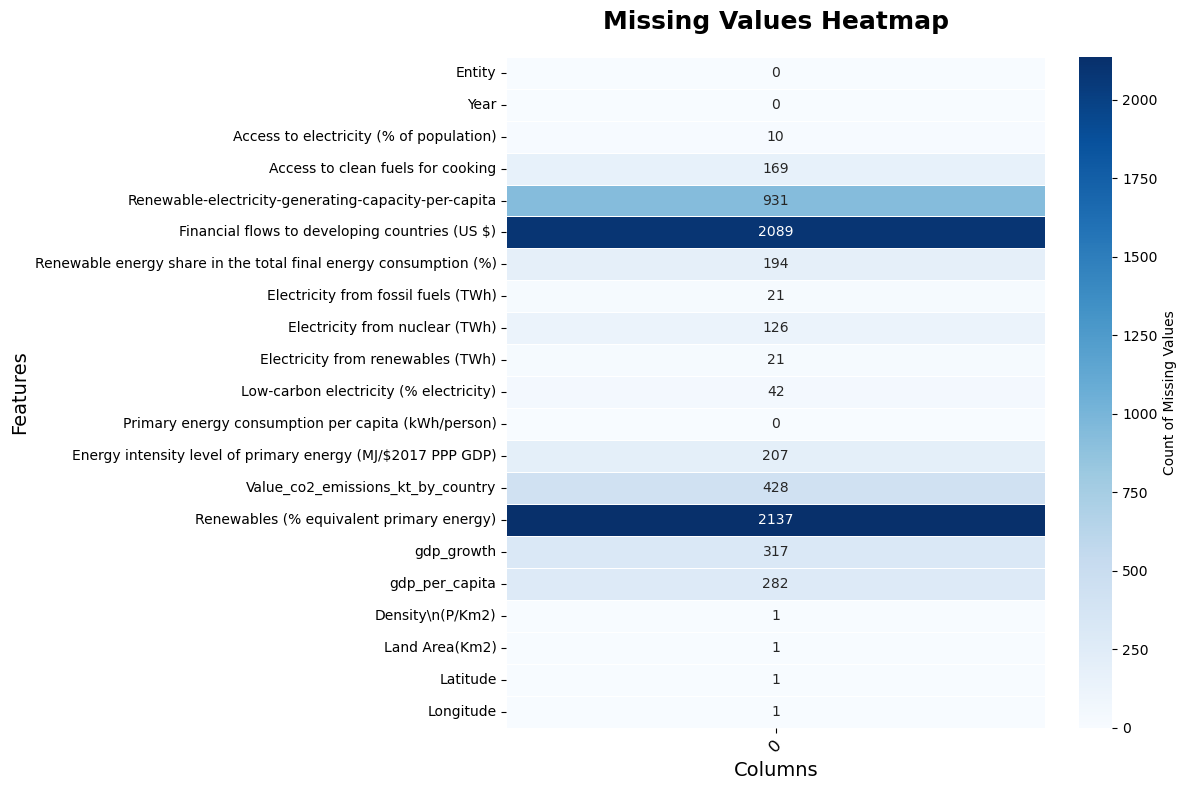

In [12]:
# Visualise Missing Values
# Purpose: Create a heatmap to visualise the distribution of missing values.

plt.figure(figsize=(12, 8))
sns.heatmap(
    missing_values.to_frame(),
    cmap='Blues',
    annot=True,
    fmt='d',
    linewidths=0.5,
    cbar_kws={'label': 'Count of Missing Values'}
)
plt.title('Missing Values Heatmap', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Columns', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

In [13]:
# Handle High-Missing Columns
# Purpose: Remove columns with excessive missing data to maintain data quality.

columns_to_drop = ['Financial flows to developing countries (US $)', 
                   'Renewables (% equivalent primary energy)', 
                   'Renewable-electricity-generating-capacity-per-capita']
df.drop(columns=columns_to_drop, inplace=True)
print(f"Columns dropped due to high missing values: {columns_to_drop}")

Columns dropped due to high missing values: ['Financial flows to developing countries (US $)', 'Renewables (% equivalent primary energy)', 'Renewable-electricity-generating-capacity-per-capita']


In [14]:
# Fill Missing Values with Mean
# Purpose: Impute missing values in selected columns using the mean.

columns_to_fill_mean = ['Access to clean fuels for cooking', 
                        'Renewable energy share in the total final energy consumption (%)',
                        'Electricity from nuclear (TWh)', 
                        'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
                        'Value_co2_emissions_kt_by_country', 
                        'gdp_growth', 'gdp_per_capita']
df[columns_to_fill_mean] = df[columns_to_fill_mean].fillna(df[columns_to_fill_mean].mean())

In [15]:
# Drop Remaining Rows with Missing Values
# Purpose: Ensure no missing values remain in the dataset.

df.dropna(inplace=True)
print("Remaining Missing Values After Cleaning:")
print(df.isna().sum())

Remaining Missing Values After Cleaning:
Entity                                                              0
Year                                                                0
Access to electricity (% of population)                             0
Access to clean fuels for cooking                                   0
Renewable energy share in the total final energy consumption (%)    0
Electricity from fossil fuels (TWh)                                 0
Electricity from nuclear (TWh)                                      0
Electricity from renewables (TWh)                                   0
Low-carbon electricity (% electricity)                              0
Primary energy consumption per capita (kWh/person)                  0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0
Value_co2_emissions_kt_by_country                                   0
gdp_growth                                                          0
gdp_per_capita                                   

In [16]:
# Check for Duplicate Rows
# Purpose: Identify and remove duplicate rows to avoid redundant data.

num_duplicates = df.duplicated().sum()
print(f"Number of Duplicate Rows: {num_duplicates}")
if num_duplicates > 0:
    df.drop_duplicates(inplace=True)
    print(f"Duplicates removed. New shape of the dataset: {df.shape}")

Number of Duplicate Rows: 0


In [17]:
# Rename Columns for Readability
# Purpose: Improve clarity of column names for better understanding.

df.rename(columns={
    "Value_co2_emissions_kt_by_country": "CO2 Emissions (kt)",
    "Land Area(Km2)": "Land Area (km²)",
    "Density\\n(P/Km2)": "Density (P/km²)"
}, inplace=True)

In [18]:
# Convert 'Density' to Numeric Format
# Purpose: Clean and standardize the 'Density' column for analysis.

df['Density (P/km²)'] = df['Density (P/km²)'].str.replace(',', '').astype(float)

In [19]:
# Analyze Numerical and Categorical Features
# Purpose: Get summary statistics for numerical and categorical columns.

numeric_data = df.select_dtypes(include='number')
categorical_data = df.select_dtypes(exclude='number')
print("\n--- Numerical Data Summary ---")
print(numeric_data.describe().transpose())
print("\n--- Categorical Data Summary ---")
print(categorical_data.nunique())


--- Numerical Data Summary ---
                                                     count           mean  \
Year                                                3597.0    2010.060606   
Access to electricity (% of population)             3597.0      78.705977   
Access to clean fuels for cooking                   3597.0      63.511656   
Renewable energy share in the total final energ...  3597.0      32.845165   
Electricity from fossil fuels (TWh)                 3597.0      70.970904   
Electricity from nuclear (TWh)                      3597.0      13.566108   
Electricity from renewables (TWh)                   3597.0      24.174573   
Low-carbon electricity (% electricity)              3597.0      36.903493   
Primary energy consumption per capita (kWh/person)  3597.0   25847.609790   
Energy intensity level of primary energy (MJ/$2...  3597.0       5.319477   
CO2 Emissions (kt)                                  3597.0  161907.063671   
gdp_growth                                  

In [20]:
# Key Statistics
# Purpose: Calculate and display mean values for selected key indicators.

print("\n--- Key Statistics ---")
for col in ['Access to clean fuels for cooking', 
            'Renewable energy share in the total final energy consumption (%)', 
            'CO2 Emissions (kt)', 'gdp_per_capita']:
    mean_value = df[col].mean()
    print(f"Mean {col}: {mean_value:.2f}")


--- Key Statistics ---
Mean Access to clean fuels for cooking: 63.51
Mean Renewable energy share in the total final energy consumption (%): 32.85
Mean CO2 Emissions (kt): 161907.06
Mean gdp_per_capita: 12912.01


In [21]:
# Correlation analysis
# Purpose: Calculate and display correlation matrix to understand relationships.

correlation_matrix = numeric_data.corr()
print(correlation_matrix)

                                                        Year  \
Year                                                1.000000   
Access to electricity (% of population)             0.125712   
Access to clean fuels for cooking                   0.064450   
Renewable energy share in the total final energ... -0.023255   
Electricity from fossil fuels (TWh)                 0.032060   
Electricity from nuclear (TWh)                     -0.005461   
Electricity from renewables (TWh)                   0.073513   
Low-carbon electricity (% electricity)              0.026373   
Primary energy consumption per capita (kWh/person)  0.001562   
Energy intensity level of primary energy (MJ/$2... -0.146092   
CO2 Emissions (kt)                                  0.021141   
gdp_growth                                         -0.187968   
gdp_per_capita                                      0.131025   
Density (P/km²)                                    -0.002369   
Land Area (km²)                         

In [22]:
# Function to extract and print key insights from correlation matrix
# Purpose: Highlight strong and moderate correlations among features.

def print_key_insights(correlation_matrix, threshold=0.3):
    print("### Key Insights from Correlation Matrix ###\n")
    
    # Flatten the correlation matrix and reset index for pairwise correlations
    corr_pairs = correlation_matrix.unstack().reset_index()
    corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']
    
    # Filter out self-correlations (correlation of a variable with itself)
    corr_pairs = corr_pairs[corr_pairs['Variable 1'] != corr_pairs['Variable 2']]
    
    # Filter for strong and moderate correlations
    strong_corr = corr_pairs[abs(corr_pairs['Correlation']) > 0.7].drop_duplicates(subset=['Correlation'])
    moderate_corr = corr_pairs[(abs(corr_pairs['Correlation']) > threshold) & 
                                (abs(corr_pairs['Correlation']) <= 0.7)].drop_duplicates(subset=['Correlation'])
    
    # Display Strong Correlations
    if not strong_corr.empty:
        print("Strong Correlations (|r| > 0.7):\n")
        for _, row in strong_corr.iterrows():
            print(f"  {row['Variable 1']} and {row['Variable 2']}: r = {row['Correlation']:.2f}")
    else:
        print("No strong correlations found.\n")
    
    print("\nModerate Correlations (0.3 ≤ |r| ≤ 0.7):\n")
    if not moderate_corr.empty:
        for _, row in moderate_corr.iterrows():
            print(f"  {row['Variable 1']} and {row['Variable 2']}: r = {row['Correlation']:.2f}")
    else:
        print("No moderate correlations found.\n")

# Display key insights from the correlation matrix
print_key_insights(correlation_matrix)

### Key Insights from Correlation Matrix ###

Strong Correlations (|r| > 0.7):

  Access to electricity (% of population) and Access to clean fuels for cooking: r = 0.86
  Access to electricity (% of population) and Renewable energy share in the total final energy consumption (%): r = -0.77
  Access to clean fuels for cooking and Renewable energy share in the total final energy consumption (%): r = -0.76
  Electricity from fossil fuels (TWh) and Electricity from renewables (TWh): r = 0.85
  Electricity from fossil fuels (TWh) and CO2 Emissions (kt): r = 0.95
  Electricity from renewables (TWh) and CO2 Emissions (kt): r = 0.79
  Electricity from renewables (TWh) and Land Area (km²): r = 0.70

Moderate Correlations (0.3 ≤ |r| ≤ 0.7):

  Access to electricity (% of population) and Primary energy consumption per capita (kWh/person): r = 0.46
  Access to electricity (% of population) and gdp_per_capita: r = 0.41
  Access to electricity (% of population) and Latitude: r = 0.42
  Access to cl

## <div style="border-radius:10px; border:2px solid #3eb489; padding: 15px; background-color: #0066CC; font-size:110%; text-align:center; color: white;">Analysis and Insights</div>

## Visualisation 1: Bubble Chart - Access to Electricity vs Renewable Energy Share
**Purpose**: Visualise the relationship between electricity access and renewable energy share, highlighting disparities in energy access and reliance on renewable energy globally.

In [ ]:
# Bubble chart for Access to Electricity vs Renewable Energy Share
fig = px.scatter(
    df,
    x='Access to electricity (% of population)',
    y='Renewable energy share in the total final energy consumption (%)',
    size='gdp_per_capita',
    color='Entity',  # Using country as the differentiating factor
    hover_name='Entity',
    title='Access to Electricity vs Renewable Energy Share',
    labels={
        'Access to electricity (% of population)': 'Access to Electricity (%)',
        'Renewable energy share in the total final energy consumption (%)': 'Renewable Energy Share (%)',
        'gdp_per_capita': 'GDP per Capita'
    }
)

# Customize chart layout and marker properties for better readability
fig.update_layout(
    title_x=0.5,  # Center the title
    legend_title_text='Country',
    width=1000,  # Increase figure width
    height=600,  # Increase figure height
    margin=dict(l=50, r=50, t=100, b=50)  # Adjust margins
)

fig.update_traces(
    marker=dict(
        sizemode='area',  # Bubble size corresponds to area
        opacity=0.7,  # Add transparency to reduce overlap
        line=dict(width=1, color='DarkSlateGrey')  # Add a border to bubbles
    )
)

# Display the chart
fig.show()

![Access to Electricity vs Renewable Energy Share](access_electricity_vs_renewable.png)

In [ ]:
# Key Insights: Top 10 Countries with High Electricity Access but Low Renewable Energy Share
# Purpose: Identify countries with high electricity access (>90%) but low renewable energy share (<20%).

high_access_low_renewables = df[
    (df['Access to electricity (% of population)'] > 90) &  
    (df['Renewable energy share in the total final energy consumption (%)'] < 20)  
]

high_access_low_renewables_unique = (
    high_access_low_renewables
    .drop_duplicates(subset=['Entity'])  # Ensure distinct countries
    .sort_values('Renewable energy share in the total final energy consumption (%)')  # Sort by renewable energy share
    .head(10)  # Select top 10 countries
)

print("1. Top 10 countries with high electricity access but low renewable energy share:")
print(high_access_low_renewables_unique[['Entity', 
                                         'Access to electricity (% of population)', 
                                         'Renewable energy share in the total final energy consumption (%)']].to_string(index=False))

In [ ]:
# Key Insights: Top 10 Countries with Low Electricity Access but High Renewable Energy Share
# Purpose: Identify countries with low electricity access (<50%) but high renewable energy share (>50%).

low_access_high_renewables = df[
    (df['Access to electricity (% of population)'] < 50) &  
    (df['Renewable energy share in the total final energy consumption (%)'] > 50)  
]

low_access_high_renewables_unique = (
    low_access_high_renewables
    .drop_duplicates(subset=['Entity'])  # Ensure distinct countries
    .sort_values('Renewable energy share in the total final energy consumption (%)', ascending=False)  # Sort by renewable energy share
    .head(10)  # Select top 10 countries
)

print("\n2. Top 10 countries with low electricity access but high renewable energy share:")
print(low_access_high_renewables_unique[['Entity', 
                                         'Access to electricity (% of population)', 
                                         'Renewable energy share in the total final energy consumption (%)']].to_string(index=False))

## Insights:
1. Countries with high electricity access (e.g., developed countries) tend to have a moderate share of renewable energy, suggesting the need for further integration of renewables.
2. Regions with low electricity access (e.g., parts of Africa) often exhibit low renewable energy reliance, indicating a critical gap in clean energy infrastructure.

## Visualisation 2: Scatter Plot - Fossil Fuel Usage vs CO2 Emissions
**Purpose**: Analyze the link between fossil fuel consumption and CO2 emissions, while highlighting the impact of renewable energy share.

In [ ]:
# Scatter plot for Fossil Fuel Usage vs CO2 Emissions
fig = px.scatter(
    df,
    x='Electricity from fossil fuels (TWh)',
    y='CO2 Emissions (kt)',
    color='Renewable energy share in the total final energy consumption (%)',
    size='Primary energy consumption per capita (kWh/person)',
    hover_name='Entity',
    animation_frame='Year',  # Add a time slider for yearly trends
    title='Fossil Fuel Usage vs CO2 Emissions (Animated Over Time)',
    labels={
        'Electricity from fossil fuels (TWh)': 'Fossil Fuel Usage (TWh)',
        'CO2 Emissions (kt)': 'CO2 Emissions (kt)',
        'Renewable energy share in the total final energy consumption (%)': 'Renewable Energy Share (%)',
        'Primary energy consumption per capita (kWh/person)': 'Energy Consumption per Capita'
    },
    color_continuous_scale='Viridis'
)

# Enhance layout with logarithmic scales and additional annotations
fig.update_layout(
    title_x=0.5,  # Center the title
    xaxis=dict(title='Fossil Fuel Usage (TWh)', type='log'),  # Logarithmic scale for x-axis
    yaxis=dict(title='CO2 Emissions (kt)', type='log'),  # Logarithmic scale for y-axis
    coloraxis_colorbar=dict(title='Renewable Energy Share (%)'),
    width=1000,  # Adjust width
    height=600   # Adjust height
)

# Annotate significant outliers or key observations
fig.add_annotation(
    x=5000, y=10e6,
    text="Example Country",
    showarrow=True,
    arrowhead=2,
    arrowcolor='red',
    font=dict(size=12, color='black')
)

# Display the scatter plot
fig.show()

![Fossil Fuel Usage vs CO2 Emissions](fossil_fuel_vs_co2_emissions.png)

In [ ]:
# Highlight Key Insights from the Scatter Plot (Top 10 Distinct Countries)

# Key Insights 1: Top 10 distinct emitters by CO2 emissions
# Purpose: Identify the top 10 countries contributing the most to CO2 emissions.

top_emitters = (
    df.drop_duplicates(subset=['Entity'])  # Ensure distinct countries
    .nlargest(10, 'CO2 Emissions (kt)')  # Sort by CO2 Emissions
)
print("### Key Insight 1: Top 10 Distinct CO2 Emitters ###")
print(top_emitters[['Entity', 'CO2 Emissions (kt)', 
                    'Electricity from fossil fuels (TWh)', 
                    'Renewable energy share in the total final energy consumption (%)']].to_string(index=False))

# Key Insights 2: Top 10 distinct countries by renewable energy share
# Purpose: Highlight the top 10 countries with the highest share of renewable energy in their energy mix.

top_renewables = (
    df.drop_duplicates(subset=['Entity'])  # Ensure distinct countries
    .nlargest(10, 'Renewable energy share in the total final energy consumption (%)')  # Sort by Renewable Energy Share
)
print("\n### Key Insight 2: Top 10 Distinct Countries by Renewable Energy Share ###")
print(top_renewables[['Entity', 
                      'Renewable energy share in the total final energy consumption (%)', 
                      'Electricity from fossil fuels (TWh)', 
                      'CO2 Emissions (kt)']].to_string(index=False))

# Key Insights 3: Top 10 Countries with High Fossil Fuel Usage but Low Renewables (<20%)
# Purpose: Identify countries with high fossil fuel usage (>100 TWh) and low renewable energy share (<30%).

high_fossil_low_renewables = (
    df[
        (df['Electricity from fossil fuels (TWh)'] > 100) &  # Lower threshold
        (df['Renewable energy share in the total final energy consumption (%)'] < 30)  # Higher threshold
    ]
    .drop_duplicates(subset=['Entity'])  # Ensure distinct countries
    .nlargest(10, 'CO2 Emissions (kt)')  # Sort by CO2 Emissions
)

print("\n### Key Insight 3: Top 10 Distinct Countries with High Fossil Fuel Usage and Low Renewables ###")
print(high_fossil_low_renewables[['Entity', 
                                  'Electricity from fossil fuels (TWh)', 
                                  'Renewable energy share in the total final energy consumption (%)', 
                                  'CO2 Emissions (kt)']].to_string(index=False))

# Key Insights 4: Top 10 Countries with Low Fossil Fuel Usage and High Renewables (>80%)
# Purpose: Identify countries with low fossil fuel usage (<100 TWh) and high renewable energy share (>80%).

low_fossil_high_renewables = (
    df[
        (df['Electricity from fossil fuels (TWh)'] < 100) & 
        (df['Renewable energy share in the total final energy consumption (%)'] > 80)
    ]
    .drop_duplicates(subset=['Entity'])  # Ensure distinct countries
    .nlargest(10, 'CO2 Emissions (kt)')  # Sort by CO2 Emissions
)
print("\n### Key Insight 4: Top 10 Distinct Countries with Low Fossil Fuel Usage and High Renewables ###")
print(low_fossil_high_renewables[['Entity', 
                                  'Renewable energy share in the total final energy consumption (%)', 
                                  'Electricity from fossil fuels (TWh)', 
                                  'CO2 Emissions (kt)']].to_string(index=False))

## Insights:
1. A strong positive correlation exists between fossil fuel electricity generation and CO2 emissions, highlighting the urgent need for decarbonization.
2. Countries with higher renewable energy shares show reduced CO2 emissions, even with moderate fossil fuel usage, underscoring the effectiveness of renewables.

## Visualisation 3: Bubble Chart - Energy Intensity vs GDP Per Capita
**Purpose**: Explore the relationship between energy intensity, GDP per capita, and renewable energy share.

In [ ]:
# Bubble chart for Energy Intensity vs GDP Per Capita
fig = px.scatter(
    df,
    x='gdp_per_capita',
    y='Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
    size='Renewable energy share in the total final energy consumption (%)',  # Bubble size
    color='Renewable energy share in the total final energy consumption (%)',  # Bubble color
    hover_name='Entity',
    title='Energy Intensity vs GDP Per Capita',
    labels={
        'gdp_per_capita': 'GDP per Capita ($)',
        'Energy intensity level of primary energy (MJ/$2017 PPP GDP)': 'Energy Intensity (MJ/$)',
        'Renewable energy share in the total final energy consumption (%)': 'Renewable Energy Share (%)'
    },
    color_continuous_scale='Viridis'
)

# Adjust chart layout for enhanced readability
fig.update_layout(
    title_x=0.5,  # Center the title
    height=600,  # Adjust chart height
    width=900,   # Adjust chart width
    coloraxis_colorbar=dict(title='Renewable Energy Share (%)')
)

# Display the bubble chart
fig.show()

![Energy Intensity vs GDP Per Capita](energy_intensity_vs_gdp.png)

In [ ]:
# Define top_energy_intensity
# Purpose: Highlight top 10 countries with the highest energy intensity.

top_energy_intensity = (
    df[['Entity', 
        'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 
        'gdp_per_capita', 
        'Renewable energy share in the total final energy consumption (%)']]
    .drop_duplicates(subset=['Entity'])  # Ensure distinct countries
    .nlargest(10, 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)')  # Sort by energy intensity
)

# Define top_gdp_per_capita
# Purpose: Highlight top 10 countries with the highest GDP per capita.

top_gdp_per_capita = (
    df[['Entity', 
        'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 
        'gdp_per_capita', 
        'Renewable energy share in the total final energy consumption (%)']]
    .drop_duplicates(subset=['Entity'])  # Ensure distinct countries
    .nlargest(10, 'gdp_per_capita')  # Sort by GDP per capita
)

# Format the Energy Intensity DataFrame
# Purpose: Prepare a readable and styled DataFrame for top energy intensity countries.

formatted_energy_intensity = (
    top_energy_intensity.rename(columns={
        'Entity': 'Country',
        'Energy intensity level of primary energy (MJ/$2017 PPP GDP)': 'Energy Intensity (MJ/$)',
        'gdp_per_capita': 'GDP per Capita ($)',
        'Renewable energy share in the total final energy consumption (%)': 'Renewable Energy Share (%)'
    })
    .style.set_caption("Top 10 Countries by Energy Intensity")
    .format({"Energy Intensity (MJ/$)": "{:.2f}", 
             "GDP per Capita ($)": "{:,.2f}", 
             "Renewable Energy Share (%)": "{:.2f}"})
)

# Format the GDP per Capita DataFrame
# Purpose: Prepare a readable and styled DataFrame for top GDP per capita countries.

formatted_gdp_per_capita = (
    top_gdp_per_capita.rename(columns={
        'Entity': 'Country',
        'Energy intensity level of primary energy (MJ/$2017 PPP GDP)': 'Energy Intensity (MJ/$)',
        'gdp_per_capita': 'GDP per Capita ($)',
        'Renewable energy share in the total final energy consumption (%)': 'Renewable Energy Share (%)'
    })
    .style.set_caption("Top 10 Countries by GDP per Capita")
    .format({"Energy Intensity (MJ/$)": "{:.2f}", 
             "GDP per Capita ($)": "{:,.2f}", 
             "Renewable Energy Share (%)": "{:.2f}"})
)

# Display the formatted tables
from IPython.display import display
display(formatted_energy_intensity)
display(formatted_gdp_per_capita)

## Insights:
1. High energy intensity (inefficient energy use) is often seen in lower-income regions, emphasizing the need for efficiency improvements.
2. Regions with higher GDP per capita often exhibit lower energy intensity and higher renewable energy shares, reflecting advancements in clean technology adoption.

## <div style="border-radius:10px; border:2px solid #3eb489; padding: 15px; background-color: #0066CC; font-size:110%; text-align:center; color: white;">Modelling</div>

## Objective:
The goal of this section is to predict **CO2 emissions per capita** using key predictors such as renewable energy share, GDP per capita, and population density. The insights will help identify critical factors contributing to emissions and inform strategies for decarbonization.

## Step 1: Data Preparation

In [ ]:
# Define the features to be used for modelling
# These features are selected based on their relevance to CO2 emissions and sustainability:
features = [
    'gdp_per_capita',  # Represents the economic output per person ($)
    'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',  # Measures energy use efficiency relative to GDP
    'Renewable energy share in the total final energy consumption (%)',  # Proportion of renewable energy in total energy use
    'Electricity from fossil fuels (TWh)',  # Total electricity generated using fossil fuels (in terawatt-hours)
    'Low-carbon electricity (% electricity)'  # Percentage of electricity generated from low-carbon sources
]

# Define the target variable to predict
target = 'CO2 Emissions (kt)'  # Represents the total carbon dioxide emissions in kilotons

# Prepare the dataset by dropping rows with missing values in the selected features or target
df_model = df[features + [target]].dropna()

# Split the dataset into features (X) and target (y)
# X contains the predictor variables, while y contains the variable to be predicted
X = df_model[features]  # Features for the model
y = df_model[target]  # Target variable for prediction

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

### Explanation
1. Feature Selection: Chosen predictors reflect key factors influencing CO2 emissions and align with sustainability goals.
2. Data Cleaning: Dropping rows with missing values ensures a robust dataset for training.
3. Scaling: StandardScaler is applied to prevent features with large values (e.g., GDP) from dominating the model.
4. Train-Test Split: Dividing data ensures the model is evaluated on unseen data for reliable performance metrics.

## Step 2: Model Training and Prediction

In [ ]:
# Initialize and train the Random Forest model
# Purpose: Fit the Random Forest Regressor on the training data.
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
# Purpose: Use the trained model to predict target values for the test data.
y_pred = rf_model.predict(X_test)

### Why Random Forest?
1. Robustness: Handles non-linear relationships and interactions between variables effectively.
2. Feature Importance: Provides insights into which factors are most influential in predicting CO2 emissions.

## Step 3: Model Evaluation

In [ ]:
# Evaluate the model's performance
# Purpose: Calculate common regression metrics to assess the accuracy of the model.
rmse = sqrt(mean_squared_error(y_test, y_pred))  # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
r2 = r2_score(y_test, y_pred)  # R² Score (coefficient of determination)

# Display evaluation metrics
# Purpose: Provide insights into the model's prediction accuracy and reliability.
print(f"Random Forest Evaluation Metrics:\nRMSE: {rmse:.2f}\nMAE: {mae:.2f}\nR²: {r2:.2f}")

### Insights:
1. High R² Score: The model explains 98% of the variance in CO2 emissions, indicating excellent predictive power.
2. Low Error Metrics:
- RMSE: On average, predictions deviate by ~95,211 kt from actual values.
- MAE: Average deviation of ~13,982 kt suggests minimal prediction errors.

## Step 4: Feature Importance Analysis

In [ ]:
# Extract feature importance
feature_importances = pd.DataFrame(
    {'Feature': features, 'Importance': rf_model.feature_importances_}
).sort_values(by='Importance', ascending=False)

# Visualise feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Feature Importance for Predicting CO2 Emissions', fontsize=16)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

### Insights:
**1. Key Drivers of CO2 Emissions**:

Electricity from fossil fuels (TWh) is the most significant predictor, reflecting the direct impact of fossil fuel usage.
Renewable energy share ranks second, emphasizing its role in mitigating emissions.
GDP per capita highlights economic output’s influence on emissions levels.

**2. Actionable Takeaways**:

Policies targeting a reduction in fossil fuel dependency can significantly lower emissions.
Increasing the share of renewable energy in energy portfolios is critical for decarbonization.

## Step 5: Model Performance Visualization
### Actual vs Predicted CO2 Emissions
**Purpose**: Visualise the performance of the model by comparing actual and predicted values.

In [ ]:
# Actual vs Predicted Plot
# Purpose: Visualise the performance of the model by comparing actual and predicted values.

# Create a scatter plot to show the relationship between actual and predicted values.
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label='Predicted vs Actual')  # Plot predicted vs. actual values
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Fit Line')  
# Add a reference line (red dashed) indicating perfect prediction

# Add plot title and axis labels for context
plt.title('Actual vs Predicted CO2 Emissions', fontsize=16)
plt.xlabel('Actual CO2 Emissions (kt)', fontsize=14)
plt.ylabel('Predicted CO2 Emissions (kt)', fontsize=14)

# Enable grid for better visual clarity
plt.grid(True)

# Add a legend to explain the plot elements
plt.legend(fontsize=12)

# Display the plot
plt.show()

### Insights:
1. The predicted values align closely with the actual values, as shown by the clustering of points near the Perfect Fit Line.
2. A few outliers at higher CO2 emission levels suggest opportunities for refining the model further.
3. This visualization demonstrates the model's high accuracy, as reflected in the R² score of 0.98.

## Step 6: Save the Trained Model and Scaler
**Purpose:** Save the trained Random Forest model and scaler for deployment or future use.

In [ ]:
# Save the Trained Model and Scaler
# Purpose: Save the Random Forest model and scaler for future use or deployment.

import joblib  # Import joblib for saving models and scalers

# Save the Random Forest model to a file
joblib.dump(rf_model, 'random_forest_model.pkl')  

# Save the scaler to a file
joblib.dump(scaler, 'scaler.pkl')  

print("Model and scaler saved successfully.")

# Output files: 
# - 'random_forest_model.pkl' for the model
# - 'scaler.pkl' for the scaler

## <div style="border-radius:10px; border:2px solid #3eb489; padding: 15px; background-color: #0066CC; font-size:110%; text-align:center; color: white;">Conclusion and Recommendations</div>

## Conclusion

This project explored **CO2 emissions** across countries by analyzing key indicators like GDP per capita, renewable energy share, and fossil fuel usage. The analysis combined data visualizations and machine learning modeling to provide the following insights:

1. **Data Visualization Insights**:
   - Countries with higher reliance on fossil fuels show significantly higher CO2 emissions.
   - Regions with a greater share of renewable energy demonstrate lower emissions, highlighting the positive impact of sustainable energy adoption.
   - Developing regions often struggle with energy access while maintaining higher energy intensity, suggesting inefficiencies.

2. **Modeling Insights**:
   - The Random Forest model achieved an **R² score of 0.98**, indicating strong predictive power.
   - **Electricity from fossil fuels** and **GDP per capita** are the most critical factors driving CO2 emissions.
   - Increasing renewable energy share directly correlates with a reduction in emissions, as shown by feature importance analysis.

## Recommendations

Based on the findings, the following actionable steps are suggested:

1. **Reduce Fossil Fuel Dependency**:
   Invest in renewable energy infrastructure to replace fossil fuel-based electricity generation, especially in high-emission regions.

2. **Improve Energy Efficiency**:
   Implement policies that promote energy efficiency to lower energy intensity, particularly in developing regions.

3. **Promote Renewable Energy Adoption**:
   Encourage financial incentives and international collaboration to increase the share of renewable energy in countries with low adoption rates.

4. **Targeted Policy Interventions**:
   Focus on improving energy access while ensuring clean energy adoption to support equitable development.

By implementing these strategies, significant progress can be made toward **reducing CO2 emissions** and achieving **Sustainable Development Goal 7 (Affordable and Clean Energy)** and **SDG 13 (Climate Action)**.

## <div style="border-radius:10px; border:2px solid #FFA500; padding: 15px; background-color: #FFFACD; font-size:110%; text-align:center; color: #FF4500;">Finish</div>